# Introducción

*   Se presenta como problemática la clasificación de flores, explicitamente de tres tipos: Iris Setosa, Iris Virginica e Iris Versicolor.
*   El objetivo del laboratorio es diseñar un clasificador neuronal poco profundo que permita identificar que tipo de flor es en base a cuatro caracteristicas, a saber, largo del sepalo, ancho del sepalo, largo del petalo y ancho del petalo


# Experimentos

*   Se utilizará la base de datos iris.csv 
*   Carga de datos
*   Separacion de los datos: Conjunto de entrenamiento, conjunto de prueba y conjunto de validación
*   Diseño del modelo
* Entrenamiento
* Validación

## Carga de la base de datos

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


## Diseño del modelo propuesto

Se presenta una red neuronal poco profunda que cuenta con 3 capas (Ver Tabla 1), la primera capa cuenta con 4 entradas de acuerdo a la cantidad de caracteristicas de entrada que nos proporciona la base de datos, el numero de salidas de dicha capa se fundamenta en la cantidad de observaciones del conjunto de entrenamiento. La segunda es una capa oculta que tiene como entrada la salida de la capa anterior y el numero de salidas corresponde a $y_h=x_i\sqrt{x_h *y_f}$ donde $x_h$ es la cantidad de entradas para la capa oculta, $y_f$ la cantidad de salidas de la capa siguiente y $x_i$ la cantidad de entradas iniciales.
<table 
  <tr>
    <th></th>
    <th>Capa 1</th>
    <th>Capa 2</th>
    <th>Capa 3</th>
  </tr>
  <tr>
    <th>N Entradas</th>
    <td>4</td>
    <td>84</td>
    <td>37</td>
  </tr>
  <tr>
    <th>N Salidas</th>
    <td>84</td>
    <td>37</td>
    <td>3</td>
  </tr>
</table>
<center>Tabla 1 .- Capas</center>

## Parámetros y configuración del modelo

* Funcion de Activacion: Relu
* Funcion de Perdida: Cross-Entropy
* Optimizador: Adam
* Tasa de aprendizaje: 0.001


cargar tensores

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))

Tesla V100-SXM2-16GB


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))
torch.cuda.empty_cache()

Tesla V100-SXM2-16GB


In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp2.pt')


CPU times: user 4.02 s, sys: 3.29 s, total: 7.31 s
Wall time: 14.5 s
CPU times: user 545 ms, sys: 1.12 s, total: 1.67 s
Wall time: 20 s
CPU times: user 503 ms, sys: 1.05 s, total: 1.56 s
Wall time: 25 s
CPU times: user 3.17 ms, sys: 104 µs, total: 3.27 ms
Wall time: 868 ms
CPU times: user 1.95 ms, sys: 958 µs, total: 2.9 ms
Wall time: 405 ms
CPU times: user 2.29 ms, sys: 273 µs, total: 2.56 ms
Wall time: 466 ms


In [ ]:
print(f'{X1_trainp1.shape} {y1_trainp1.shape}')
print(f'{X1_trainp2.shape} {y1_trainp2.shape}')
print(f'{X1_trainp3.shape} {y1_trainp3.shape}')

torch.Size([25000, 20000]) torch.Size([25000, 1])
torch.Size([25000, 20000]) torch.Size([25000, 1])
torch.Size([23783, 20000]) torch.Size([23783, 1])


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 
def crearModelo():
  K.clear_session( )
  model = Sequential()
  model.add(Dense(64,  activation='relu'))
  model.add(Dense(2,  activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  return model

# Pruebas y validación

Del conjunto de datos se tiene un total de 150 observaciones, de estas se separan en tres nuevos conjuntos; conjunto de entrenamiento 84 observaciones, conjunto de prueba 30 observaciones y conjunto de validacion 36 observaciones, correspondiendo a un 56%,  20% y 24% respectivamente.

In [ ]:
print(X1_trainp1.shape)
print(X1_trainp2.shape)
print(X1_trainp3.shape)

torch.Size([25000, 20000])
torch.Size([25000, 20000])
torch.Size([23783, 20000])


In [ ]:
print(y1_trainp1.shape)
print(y1_trainp2.shape)
print(y1_trainp3.shape)

torch.Size([25000, 1])
torch.Size([25000, 1])
torch.Size([23783, 1])


In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)





##Modelo 1

In [ ]:
modelo1  = crearModelo()

In [ ]:
history = modelo1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.3357 - categorical_accuracy: 0.8563
Epoch 2/10
782/782 - 3s - loss: 0.1476 - categorical_accuracy: 0.9468
Epoch 3/10
782/782 - 3s - loss: 0.0943 - categorical_accuracy: 0.9669
Epoch 4/10
782/782 - 3s - loss: 0.0657 - categorical_accuracy: 0.9774
Epoch 5/10
782/782 - 3s - loss: 0.0467 - categorical_accuracy: 0.9850
Epoch 6/10
782/782 - 3s - loss: 0.0333 - categorical_accuracy: 0.9894
Epoch 7/10
782/782 - 3s - loss: 0.0228 - categorical_accuracy: 0.9928
Epoch 8/10
782/782 - 3s - loss: 0.0171 - categorical_accuracy: 0.9946
Epoch 9/10
782/782 - 3s - loss: 0.0108 - categorical_accuracy: 0.9974
Epoch 10/10
782/782 - 3s - loss: 0.0083 - categorical_accuracy: 0.9978


In [ ]:
history = modelo1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.2473 - categorical_accuracy: 0.9103
Epoch 2/10
782/782 - 3s - loss: 0.1092 - categorical_accuracy: 0.9577
Epoch 3/10
782/782 - 3s - loss: 0.0678 - categorical_accuracy: 0.9757
Epoch 4/10
782/782 - 3s - loss: 0.0434 - categorical_accuracy: 0.9861
Epoch 5/10
782/782 - 3s - loss: 0.0282 - categorical_accuracy: 0.9903
Epoch 6/10
782/782 - 3s - loss: 0.0187 - categorical_accuracy: 0.9932
Epoch 7/10
782/782 - 3s - loss: 0.0129 - categorical_accuracy: 0.9951
Epoch 8/10
782/782 - 3s - loss: 0.0092 - categorical_accuracy: 0.9964
Epoch 9/10
782/782 - 3s - loss: 0.0070 - categorical_accuracy: 0.9971
Epoch 10/10
782/782 - 3s - loss: 0.0056 - categorical_accuracy: 0.9977


In [ ]:
history = modelo1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 3s - loss: 0.2158 - categorical_accuracy: 0.9262
Epoch 2/10
744/744 - 3s - loss: 0.0890 - categorical_accuracy: 0.9671
Epoch 3/10
744/744 - 3s - loss: 0.0529 - categorical_accuracy: 0.9818
Epoch 4/10
744/744 - 3s - loss: 0.0339 - categorical_accuracy: 0.9887
Epoch 5/10
744/744 - 3s - loss: 0.0230 - categorical_accuracy: 0.9921
Epoch 6/10
744/744 - 3s - loss: 0.0161 - categorical_accuracy: 0.9934
Epoch 7/10
744/744 - 3s - loss: 0.0117 - categorical_accuracy: 0.9951
Epoch 8/10
744/744 - 3s - loss: 0.0088 - categorical_accuracy: 0.9964
Epoch 9/10
744/744 - 3s - loss: 0.0069 - categorical_accuracy: 0.9979
Epoch 10/10
744/744 - 3s - loss: 0.0055 - categorical_accuracy: 0.9983


In [ ]:
modelo1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain80.h5')

In [2]:
from keras.models import load_model
modelo1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain80.h5')

In [3]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.38 s, sys: 1.33 s, total: 2.72 s
Wall time: 13 s
CPU times: user 192 ms, sys: 467 ms, total: 659 ms
Wall time: 5.11 s
CPU times: user 277 ms, sys: 820 ms, total: 1.1 s
Wall time: 11.4 s
CPU times: user 2.45 ms, sys: 41.6 ms, total: 44.1 ms
Wall time: 296 ms
CPU times: user 4.88 ms, sys: 276 µs, total: 5.16 ms
Wall time: 221 ms
CPU times: user 2.43 ms, sys: 1.22 ms, total: 3.65 ms
Wall time: 217 ms
CPU times: user 34.8 ms, sys: 815 ms, total: 850 ms
Wall time: 9.26 s
CPU times: user 58.1 ms, sys: 1.2 s, total: 1.26 s
Wall time: 14.1 s
CPU times: user 90.4 ms, sys: 1.05 s, total: 1.14 s
Wall time: 12.4 s
CPU times: user 3.47 ms, sys: 273 µs, total: 3.74 ms
Wall time: 275 ms
CPU times: user 3.38 ms, sys: 191 µs, total: 3.57 ms
Wall time: 228 ms
CPU times: user 5.48 ms, sys: 0 ns, total: 5.48 ms
Wall time: 247 ms


In [4]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [5]:
#validacion
import numpy as np
modelo1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
modelo1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
modelo1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 4s - loss: 0.2981 - categorical_accuracy: 0.9371 - 4s/epoch - 8ms/step
469/469 - 1s - loss: 0.3162 - categorical_accuracy: 0.9367 - 1s/epoch - 3ms/step
475/475 - 1s - loss: 0.2930 - categorical_accuracy: 0.9363 - 1s/epoch - 3ms/step


[0.29298704862594604, 0.9362725615501404]

In [6]:
modelo1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain80PostEvaluate.h5')

#####Probando en cada muestra

In [1]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain80PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.71 s, sys: 1.4 s, total: 3.11 s
Wall time: 10 s
CPU times: user 219 ms, sys: 492 ms, total: 711 ms
Wall time: 3.07 s
CPU times: user 242 ms, sys: 907 ms, total: 1.15 s
Wall time: 4.35 s
CPU times: user 1.02 ms, sys: 1.02 ms, total: 2.05 ms
Wall time: 2.99 ms
CPU times: user 1.78 ms, sys: 0 ns, total: 1.78 ms
Wall time: 2.27 ms
CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 1.7 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 5s - 5s/epoch - 5ms/step
31622
acc: 0.9366580228954525
precision: 0.9356458206530065
recall: 0.9332442962746844
f1: 0.9366580228954525


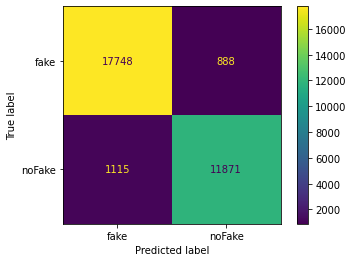

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.66 s, sys: 1.43 s, total: 3.09 s
Wall time: 10.4 s
CPU times: user 210 ms, sys: 494 ms, total: 704 ms
Wall time: 5.23 s
CPU times: user 234 ms, sys: 920 ms, total: 1.15 s
Wall time: 7.22 s
CPU times: user 3.4 ms, sys: 0 ns, total: 3.4 ms
Wall time: 198 ms
CPU times: user 4.19 ms, sys: 0 ns, total: 4.19 ms
Wall time: 209 ms
CPU times: user 4.05 ms, sys: 1.4 ms, total: 5.45 ms
Wall time: 217 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9468091834798558
precision: 0.9455597618130733
recall: 0.9444364391695357
f1: 0.9468091834798558


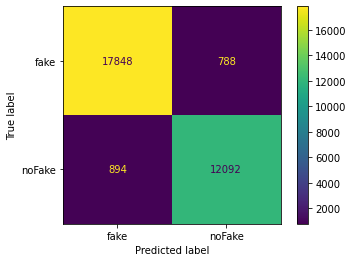

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m1.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.58 s, sys: 1.4 s, total: 2.98 s
Wall time: 10.9 s
CPU times: user 225 ms, sys: 483 ms, total: 709 ms
Wall time: 5.33 s
CPU times: user 229 ms, sys: 882 ms, total: 1.11 s
Wall time: 5.86 s
CPU times: user 3.64 ms, sys: 623 µs, total: 4.27 ms
Wall time: 247 ms
CPU times: user 3 ms, sys: 1.46 ms, total: 4.47 ms
Wall time: 204 ms
CPU times: user 4.11 ms, sys: 0 ns, total: 4.11 ms
Wall time: 259 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 7s - 7s/epoch - 7ms/step
31622
acc: 0.9476946429700841
precision: 0.9464767327641574
recall: 0.9453510983000266
f1: 0.9476946429700841


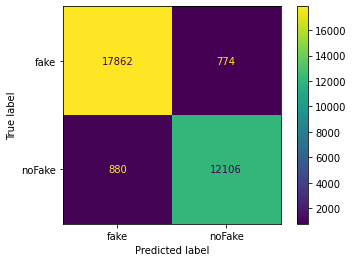

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m1.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


##Modelo 2

In [ ]:
modelo2  = crearModelo()

In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_train/y2_train_tensorp2.pt')

CPU times: user 524 ms, sys: 1.93 s, total: 2.45 s
Wall time: 28.1 s
CPU times: user 582 ms, sys: 1.18 s, total: 1.76 s
Wall time: 28 s
CPU times: user 550 ms, sys: 1.27 s, total: 1.82 s
Wall time: 26.7 s
CPU times: user 852 µs, sys: 543 µs, total: 1.4 ms
Wall time: 4.34 ms
CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 1.68 ms
CPU times: user 855 µs, sys: 133 µs, total: 988 µs
Wall time: 1.49 ms


In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)

In [ ]:
history = modelo2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.3331 - categorical_accuracy: 0.8604
Epoch 2/10
782/782 - 3s - loss: 0.1459 - categorical_accuracy: 0.9476
Epoch 3/10
782/782 - 4s - loss: 0.0933 - categorical_accuracy: 0.9685
Epoch 4/10
782/782 - 4s - loss: 0.0639 - categorical_accuracy: 0.9784
Epoch 5/10
782/782 - 4s - loss: 0.0443 - categorical_accuracy: 0.9857
Epoch 6/10
782/782 - 4s - loss: 0.0298 - categorical_accuracy: 0.9903
Epoch 7/10
782/782 - 4s - loss: 0.0211 - categorical_accuracy: 0.9935
Epoch 8/10
782/782 - 4s - loss: 0.0148 - categorical_accuracy: 0.9954
Epoch 9/10
782/782 - 4s - loss: 0.0096 - categorical_accuracy: 0.9972
Epoch 10/10
782/782 - 4s - loss: 0.0061 - categorical_accuracy: 0.9984


In [ ]:
history = modelo2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.2522 - categorical_accuracy: 0.9106
Epoch 2/10
782/782 - 4s - loss: 0.1118 - categorical_accuracy: 0.9576
Epoch 3/10
782/782 - 4s - loss: 0.0705 - categorical_accuracy: 0.9758
Epoch 4/10
782/782 - 4s - loss: 0.0454 - categorical_accuracy: 0.9854
Epoch 5/10
782/782 - 4s - loss: 0.0297 - categorical_accuracy: 0.9904
Epoch 6/10
782/782 - 4s - loss: 0.0197 - categorical_accuracy: 0.9936
Epoch 7/10
782/782 - 4s - loss: 0.0135 - categorical_accuracy: 0.9958
Epoch 8/10
782/782 - 4s - loss: 0.0096 - categorical_accuracy: 0.9972
Epoch 9/10
782/782 - 4s - loss: 0.0071 - categorical_accuracy: 0.9976
Epoch 10/10
782/782 - 4s - loss: 0.0055 - categorical_accuracy: 0.9981


In [ ]:
history = modelo2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 4s - loss: 0.2124 - categorical_accuracy: 0.9291
Epoch 2/10
744/744 - 3s - loss: 0.0867 - categorical_accuracy: 0.9694
Epoch 3/10
744/744 - 3s - loss: 0.0499 - categorical_accuracy: 0.9833
Epoch 4/10
744/744 - 3s - loss: 0.0319 - categorical_accuracy: 0.9894
Epoch 5/10
744/744 - 3s - loss: 0.0213 - categorical_accuracy: 0.9929
Epoch 6/10
744/744 - 3s - loss: 0.0150 - categorical_accuracy: 0.9950
Epoch 7/10
744/744 - 3s - loss: 0.0108 - categorical_accuracy: 0.9966
Epoch 8/10
744/744 - 4s - loss: 0.0081 - categorical_accuracy: 0.9971
Epoch 9/10
744/744 - 3s - loss: 0.0062 - categorical_accuracy: 0.9979
Epoch 10/10
744/744 - 4s - loss: 0.0050 - categorical_accuracy: 0.9983


In [ ]:
modelo2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain80.h5')

In [1]:
from keras.models import load_model
modelo2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain80.h5')

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.26 s, sys: 1.31 s, total: 2.57 s
Wall time: 9.04 s
CPU times: user 228 ms, sys: 478 ms, total: 706 ms
Wall time: 5.65 s
CPU times: user 258 ms, sys: 883 ms, total: 1.14 s
Wall time: 8.63 s
CPU times: user 3.02 ms, sys: 983 µs, total: 4 ms
Wall time: 283 ms
CPU times: user 4.01 ms, sys: 843 µs, total: 4.86 ms
Wall time: 285 ms
CPU times: user 4.42 ms, sys: 855 µs, total: 5.27 ms
Wall time: 256 ms
CPU times: user 22.9 ms, sys: 1.15 s, total: 1.17 s
Wall time: 10.2 s
CPU times: user 86.4 ms, sys: 1.1 s, total: 1.19 s
Wall time: 13.3 s
CPU times: user 47.5 ms, sys: 1.17 s, total: 1.21 s
Wall time: 10.1 s
CPU times: user 3.5 ms, sys: 0 ns, total: 3.5 ms
Wall time: 247 ms
CPU times: user 4.02 ms, sys: 0 ns, total: 4.02 ms
Wall time: 255 ms
CPU times: user 4.27 ms, sys: 48 µs, total: 4.31 ms
Wall time: 248 ms


In [3]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [4]:
#validacion
import numpy as np
modelo2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
modelo2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
modelo2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

469/469 - 4s - loss: 0.3062 - categorical_accuracy: 0.9364 - 4s/epoch - 8ms/step
469/469 - 1s - loss: 0.2847 - categorical_accuracy: 0.9393 - 1s/epoch - 3ms/step
475/475 - 1s - loss: 0.3135 - categorical_accuracy: 0.9353 - 1s/epoch - 3ms/step


[0.31349968910217285, 0.9352840185165405]

In [5]:
modelo2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain80PostEvaluate.h5')

#####Probando en cada muestra

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain80PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.57 s, sys: 1.37 s, total: 2.94 s
Wall time: 7 s
CPU times: user 219 ms, sys: 446 ms, total: 665 ms
Wall time: 3.69 s
CPU times: user 208 ms, sys: 887 ms, total: 1.1 s
Wall time: 3.88 s
CPU times: user 1.43 ms, sys: 1.55 ms, total: 2.98 ms
Wall time: 5.34 ms
CPU times: user 1.72 ms, sys: 0 ns, total: 1.72 ms
Wall time: 2.44 ms
CPU times: user 1.48 ms, sys: 275 µs, total: 1.75 ms
Wall time: 5.4 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9471570425653026
precision: 0.9454925706342194
recall: 0.9453152274510166
f1: 0.9471570425653026


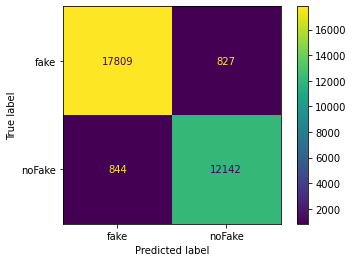

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m2.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.6 s, sys: 1.35 s, total: 2.95 s
Wall time: 7.24 s
CPU times: user 234 ms, sys: 425 ms, total: 660 ms
Wall time: 3.74 s
CPU times: user 259 ms, sys: 848 ms, total: 1.11 s
Wall time: 3.87 s
CPU times: user 1.32 ms, sys: 1.19 ms, total: 2.51 ms
Wall time: 5.7 ms
CPU times: user 1.81 ms, sys: 0 ns, total: 1.81 ms
Wall time: 3.7 ms
CPU times: user 773 µs, sys: 285 µs, total: 1.06 ms
Wall time: 4.09 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9349503510214408
precision: 0.9328696630433395
recall: 0.9327176712206819
f1: 0.9349503510214408


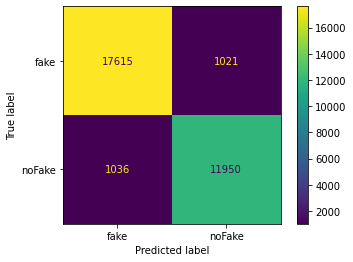

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.65 s, sys: 1.3 s, total: 2.95 s
Wall time: 6.85 s
CPU times: user 223 ms, sys: 477 ms, total: 701 ms
Wall time: 4 s
CPU times: user 229 ms, sys: 876 ms, total: 1.1 s
Wall time: 3.94 s
CPU times: user 2.77 ms, sys: 0 ns, total: 2.77 ms
Wall time: 4.97 ms
CPU times: user 805 µs, sys: 0 ns, total: 805 µs
Wall time: 3.96 ms
CPU times: user 1.56 ms, sys: 0 ns, total: 1.56 ms
Wall time: 2.47 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 5s - 5s/epoch - 6ms/step
31622
acc: 0.9460818417557397
precision: 0.9444276891441411
recall: 0.9441462038782532
f1: 0.9460818417557397


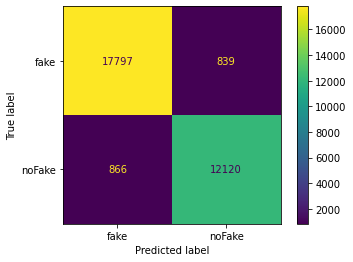

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m2.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


##Modelo 3

In [ ]:
modelo3  = crearModelo()

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_train/y3_train_tensorp2.pt')

CPU times: user 565 ms, sys: 1.98 s, total: 2.54 s
Wall time: 9.58 s
CPU times: user 543 ms, sys: 1.16 s, total: 1.7 s
Wall time: 25.4 s
CPU times: user 525 ms, sys: 1.09 s, total: 1.62 s
Wall time: 22.5 s
CPU times: user 1.34 ms, sys: 3.15 ms, total: 4.49 ms
Wall time: 2.32 s
CPU times: user 2.44 ms, sys: 501 µs, total: 2.94 ms
Wall time: 440 ms
CPU times: user 1.46 ms, sys: 1.38 ms, total: 2.85 ms
Wall time: 495 ms


In [ ]:
print(X3_trainp1.shape)
print(X3_trainp2.shape)
print(X3_trainp3.shape)

torch.Size([25000, 20000])
torch.Size([25000, 20000])
torch.Size([23783, 20000])


In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)

In [ ]:
history = modelo3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.3385 - categorical_accuracy: 0.8569
Epoch 2/10
782/782 - 2s - loss: 0.1481 - categorical_accuracy: 0.9468
Epoch 3/10
782/782 - 4s - loss: 0.0934 - categorical_accuracy: 0.9681
Epoch 4/10
782/782 - 4s - loss: 0.0633 - categorical_accuracy: 0.9791
Epoch 5/10
782/782 - 4s - loss: 0.0439 - categorical_accuracy: 0.9861
Epoch 6/10
782/782 - 4s - loss: 0.0303 - categorical_accuracy: 0.9899
Epoch 7/10
782/782 - 4s - loss: 0.0209 - categorical_accuracy: 0.9936
Epoch 8/10
782/782 - 4s - loss: 0.0141 - categorical_accuracy: 0.9960
Epoch 9/10
782/782 - 4s - loss: 0.0099 - categorical_accuracy: 0.9974
Epoch 10/10
782/782 - 4s - loss: 0.0070 - categorical_accuracy: 0.9981


In [ ]:
history = modelo3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.2493 - categorical_accuracy: 0.9094
Epoch 2/10
782/782 - 4s - loss: 0.1101 - categorical_accuracy: 0.9581
Epoch 3/10
782/782 - 4s - loss: 0.0670 - categorical_accuracy: 0.9765
Epoch 4/10
782/782 - 4s - loss: 0.0418 - categorical_accuracy: 0.9862
Epoch 5/10
782/782 - 4s - loss: 0.0265 - categorical_accuracy: 0.9913
Epoch 6/10
782/782 - 4s - loss: 0.0174 - categorical_accuracy: 0.9940
Epoch 7/10
782/782 - 4s - loss: 0.0118 - categorical_accuracy: 0.9959
Epoch 8/10
782/782 - 4s - loss: 0.0083 - categorical_accuracy: 0.9977
Epoch 9/10
782/782 - 4s - loss: 0.0061 - categorical_accuracy: 0.9984
Epoch 10/10
782/782 - 4s - loss: 0.0048 - categorical_accuracy: 0.9986


In [ ]:
history = modelo3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 4s - loss: 0.2161 - categorical_accuracy: 0.9271
Epoch 2/10
744/744 - 4s - loss: 0.0854 - categorical_accuracy: 0.9688
Epoch 3/10
744/744 - 4s - loss: 0.0490 - categorical_accuracy: 0.9835
Epoch 4/10
744/744 - 4s - loss: 0.0308 - categorical_accuracy: 0.9898
Epoch 5/10
744/744 - 4s - loss: 0.0199 - categorical_accuracy: 0.9946
Epoch 6/10
744/744 - 4s - loss: 0.0135 - categorical_accuracy: 0.9962
Epoch 7/10
744/744 - 4s - loss: 0.0094 - categorical_accuracy: 0.9976
Epoch 8/10
744/744 - 4s - loss: 0.0070 - categorical_accuracy: 0.9982
Epoch 9/10
744/744 - 4s - loss: 0.0052 - categorical_accuracy: 0.9987
Epoch 10/10
744/744 - 4s - loss: 0.0041 - categorical_accuracy: 0.9991


In [ ]:
modelo3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain80.h5')

In [1]:
from keras.models import load_model
modelo3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain80.h5')

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.37 s, sys: 1.44 s, total: 2.8 s
Wall time: 12.8 s
CPU times: user 254 ms, sys: 438 ms, total: 692 ms
Wall time: 7.47 s
CPU times: user 285 ms, sys: 876 ms, total: 1.16 s
Wall time: 9.43 s
CPU times: user 2.26 ms, sys: 1.15 ms, total: 3.4 ms
Wall time: 244 ms
CPU times: user 4.92 ms, sys: 0 ns, total: 4.92 ms
Wall time: 228 ms
CPU times: user 5.28 ms, sys: 0 ns, total: 5.28 ms
Wall time: 267 ms
CPU times: user 59.6 ms, sys: 1.09 s, total: 1.15 s
Wall time: 11.1 s
CPU times: user 23 ms, sys: 1.17 s, total: 1.19 s
Wall time: 11.6 s
CPU times: user 80.4 ms, sys: 1.06 s, total: 1.14 s
Wall time: 12.3 s
CPU times: user 3.1 ms, sys: 127 µs, total: 3.22 ms
Wall time: 208 ms
CPU times: user 4.53 ms, sys: 404 µs, total: 4.93 ms
Wall time: 245 ms
CPU times: user 3.66 ms, sys: 300 µs, total: 3.96 ms
Wall time: 206 ms


In [ ]:
print(X3_valp1.shape)
print(X3_valp2.shape)
print(X3_valp3.shape)
print(X3_testp1.shape)
print(X3_testp2.shape)
print(X3_testp3.shape)

torch.Size([15000, 20000])
torch.Size([15000, 20000])
torch.Size([15174, 20000])
torch.Size([10000, 20000])
torch.Size([10000, 20000])
torch.Size([11622, 20000])


In [3]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [4]:
#validacion
import numpy as np
modelo3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
modelo3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
modelo3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

469/469 - 4s - loss: 0.3139 - categorical_accuracy: 0.9337 - 4s/epoch - 8ms/step
469/469 - 1s - loss: 0.3164 - categorical_accuracy: 0.9328 - 1s/epoch - 3ms/step
475/475 - 1s - loss: 0.3231 - categorical_accuracy: 0.9341 - 1s/epoch - 3ms/step


[0.32309505343437195, 0.9340978264808655]

In [5]:
modelo3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain80PostEvaluate.h5')

#####Probando en cada muestra

In [1]:

from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain80PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.6 s, sys: 1.37 s, total: 2.97 s
Wall time: 7.16 s
CPU times: user 203 ms, sys: 466 ms, total: 669 ms
Wall time: 3.31 s
CPU times: user 229 ms, sys: 849 ms, total: 1.08 s
Wall time: 3.87 s
CPU times: user 2.9 ms, sys: 29 µs, total: 2.93 ms
Wall time: 5.34 ms
CPU times: user 996 µs, sys: 313 µs, total: 1.31 ms
Wall time: 2.39 ms
CPU times: user 1.07 ms, sys: 18 µs, total: 1.09 ms
Wall time: 3.88 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9448485231800645
precision: 0.9441156425462176
recall: 0.9417457494717427
f1: 0.9448485231800646


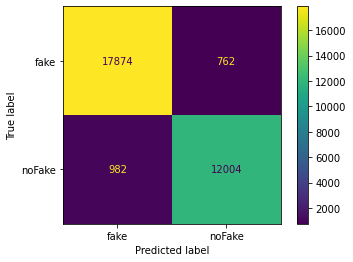

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m3.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.19 s, sys: 1.2 s, total: 2.38 s
Wall time: 5.35 s
CPU times: user 195 ms, sys: 480 ms, total: 675 ms
Wall time: 3.33 s
CPU times: user 216 ms, sys: 862 ms, total: 1.08 s
Wall time: 3.87 s
CPU times: user 2.77 ms, sys: 364 µs, total: 3.14 ms
Wall time: 5.79 ms
CPU times: user 772 µs, sys: 0 ns, total: 772 µs
Wall time: 3.09 ms
CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 4 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9439314401366138
precision: 0.9430624133196781
recall: 0.9409093194523519
f1: 0.9439314401366138


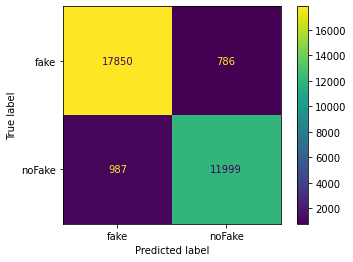

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m3.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.62 s, sys: 1.33 s, total: 2.95 s
Wall time: 6.7 s
CPU times: user 235 ms, sys: 441 ms, total: 676 ms
Wall time: 5.23 s
CPU times: user 293 ms, sys: 804 ms, total: 1.1 s
Wall time: 5.64 s
CPU times: user 969 µs, sys: 894 µs, total: 1.86 ms
Wall time: 4.95 ms
CPU times: user 1.05 ms, sys: 362 µs, total: 1.41 ms
Wall time: 4.62 ms
CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 2.33 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9367528935551198
precision: 0.9356160136403119
recall: 0.933488210610155
f1: 0.9367528935551198


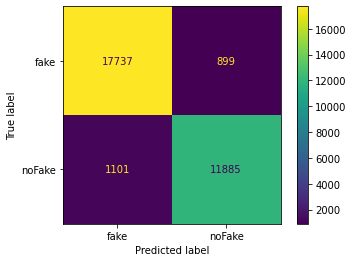

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


# Resultados



Utilizando el conjunto de prueba

Utilizando el conjunto de validacion

# Conclusiones
De un total de 150 observaciones, 4 caracteristicas y 3 etiquetas de clasificacion, se ha demostrado que el modelo presentado logra clasificar con un accuracy de 93% para el conjunto de prueba y un 100% para el conjunto de validación.
